In [1]:
# (Hack) add the parent directory to the path in order to be able to import the posCouche module 
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from posCouche.ic_utils import *

In [40]:
from matplotlib.pyplot import *
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

In [3]:
# Atomic mass
A_H = 1
A_D = 2
A_He3= 3

In [4]:
## Tore Supra parameters    
#R0 = 2.4 # m
#a = 0.72 # m
#source_frequencies = [42, 48, 57, 63, 76]

# WEST parameters    
#R0 = 2.5 # m
a = 0.5 # m
B0 = 3.7 # T 
source_frequencies = [48, 53, 55.5, 57, 63]

In [5]:
# Calculates the cyclotron frequencies vs f
f_RF = np.linspace(40e6, 65e6, 30)

In [6]:
species = ('H', '3He')


In [7]:
f = {}
for spec in species:
    f[spec] = IC_resonance_radius(f=f_RF, species=spec)


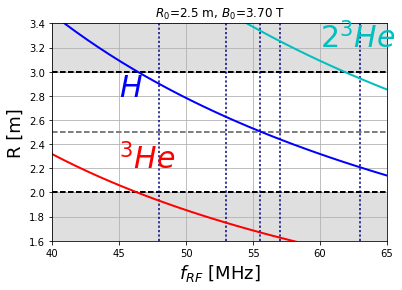

In [44]:
Itor = 1250

R_cis_2H, R_cis_1H, R_cis_He3, R_cis_2He3 = [], [], [], []
for f in f_RF:
    R_cis_1H.append(IC_resonance_radius(f=f/1e6, Itor=Itor, species='H', n=1))
    R_cis_2H.append(IC_resonance_radius(f=f/1e6, Itor=Itor, species='H', n=2))
    R_cis_He3.append(IC_resonance_radius(f=f/1e6, Itor=Itor, species='3He', n=1))  
    R_cis_2He3.append(IC_resonance_radius(f=f/1e6, Itor=Itor, species='3He', n=2))  
R_cis_1H = np.array(R_cis_1H)
R_cis_2H = np.array(R_cis_2H)
R_cis_He3 = np.array(R_cis_He3)
R_cis_2He3 = np.array(R_cis_2He3)

# Plotting
fig, ax=subplots(1,1)
# 1H
#fill_between(f_RF, R_cis_1H[:,0], R_cis_1H[:,2], alpha=0.2, color='b')
ax.plot(f_RF/1e6, R_cis_1H, lw=2, color='b')
text(45,2.8, '$H$', color='b', fontsize=30)

# 2H
#fill_between(f_RF, R_cis_2H[:,0], R_cis_2H[:,2], alpha=0.2, color='g')
ax.plot(f_RF/1e6, R_cis_2H, lw=2, color='g')
#text(70,2, '$2H$', color='g', fontsize=30)

# 1He3
#fill_between(f_RF, R_cis_2H[:,0], R_cis_2H[:,2], alpha=0.2, color='g')
ax.plot(f_RF/1e6, R_cis_He3, lw=2, color='r')
text(45,2.2, '$^3He$', color='r', fontsize=30)

# 2He3
#fill_between(f_RF, R_cis_2He3[:,0], R_cis_2He3[:,2], alpha=0.2, color='r')
ax.plot(f_RF/1e6, R_cis_2He3, lw=2, color='c')
text(60,3.2, '$2^3He$', color='c', fontsize=30)

ax.set_xlabel('$f_{RF}$ [MHz]', fontsize=18)
ax.set_ylabel('R [m]', fontsize=18)
ax.grid(True)

ax.set_ylim(1.6, 3.4)
# Machine limits
axhspan(1.6, 2, color='gray', alpha=0.25)
ax.hlines(2.0, 40, 65, color='k', linestyles='--', lw=2)
ax.hlines(2.5, 40, 65, color='gray', linestyles='--', lw=2)
ax.hlines(3.0, 40, 65, color='k', linestyles='--', lw=2)
axhspan(3, 3.4, color='gray', alpha=0.25)

ax.set_xlim(40, 65)
title('$R_0$=2.5 m, $B_0$={0:.2f} T'.format(Itor/1250*3.7))
#R_1H = []
#R_ripple = []
#for f in f_RF:
#    res_cond, R_ripple1, R_wo_ripple = coucherip(np.array([R0]), np.array([0]), B0, f/1e6, 1, +1, A_H)
#    R_ripple.append(R_ripple1)#

# Display pre-tuned frequencies
for f_s in source_frequencies:
    ax.vlines(f_s, 1.6, 3.4, linestyle=':', color='navy')
